In [11]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:

data1=pd.read_csv('Ampara.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data1 = data1.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data2 = pd.read_csv('Batticaloa.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data2 = data2.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data3 = pd.read_csv('Monaragala.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data3 = data3.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)


data_list=[data1,data2,data3]
#data = pd.concat([data1, data2, data3])
data = pd.concat(data_list)
#data.reset_index(drop=True, inplace=True)
#data = data.sort_index()
#data = data.groupby('timestamp_index').mean()
Length=len(data)
data



,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-05-12 00:00:00,2.25,32.58,65.75,0.0,12.0,4.0,5.0
2023-05-12 01:00:00,2.00,32.17,66.50,1.0,12.0,4.0,5.0
2023-05-12 02:00:00,2.00,31.72,67.00,2.0,12.0,4.0,5.0
2023-05-12 03:00:00,2.50,31.50,67.50,3.0,12.0,4.0,5.0
2023-05-12 04:00:00,4.75,31.22,68.75,4.0,12.0,4.0,5.0
...,...,...,...,...,...,...,...
2023-12-21 13:00:00,3.00,32.25,61.00,13.0,21.0,3.0,12.0
2023-12-21 14:00:00,2.75,32.28,61.25,14.0,21.0,3.0,12.0
2023-12-21 15:00:00,3.75,31.72,64.75,15.0,21.0,3.0,12.0


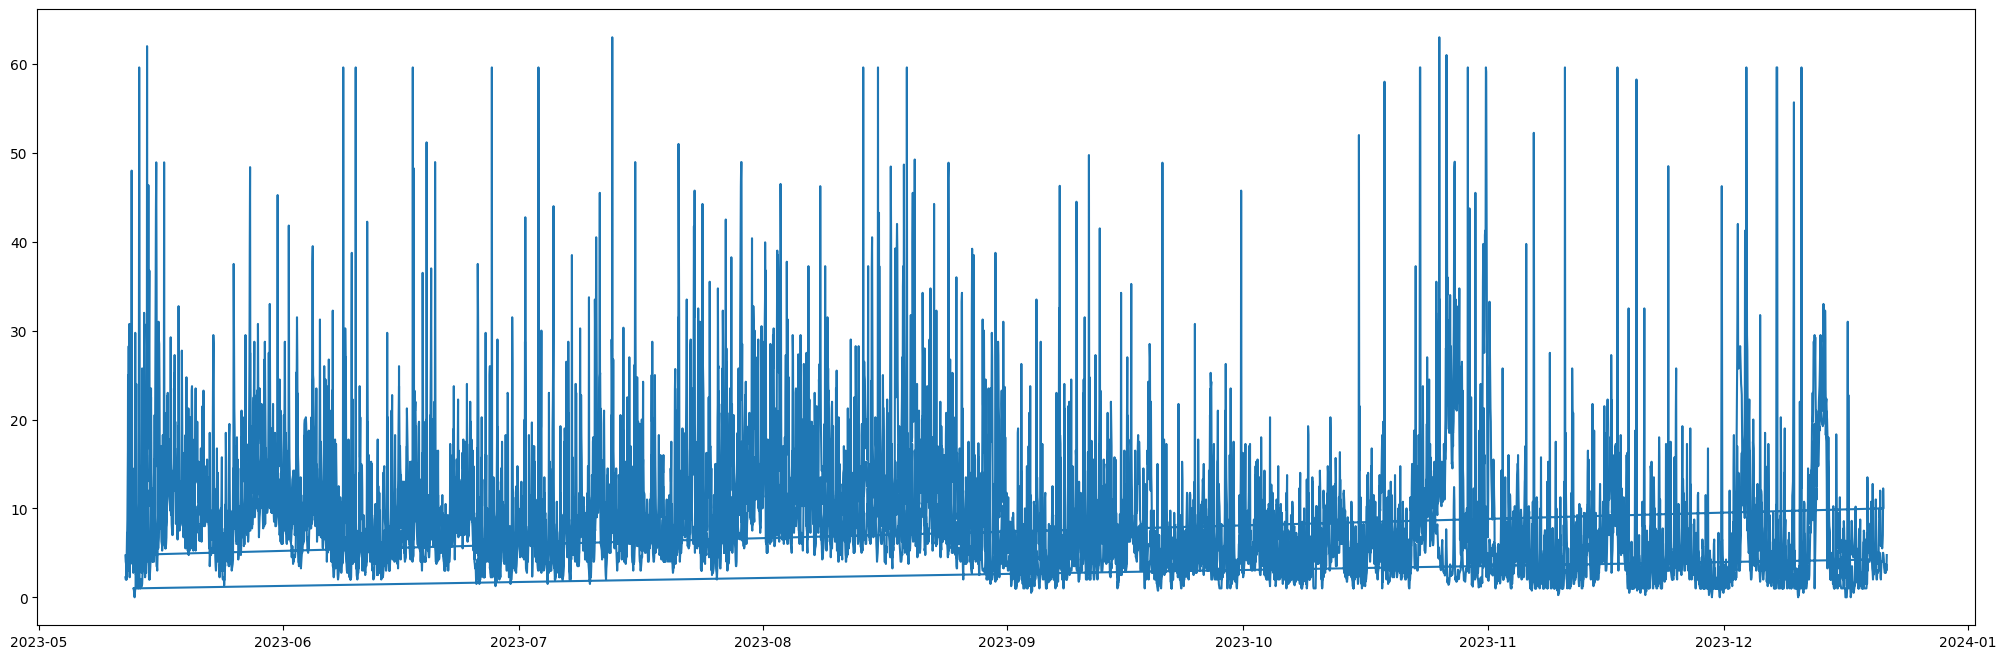

In [4]:
plt.figure(figsize=(25, 8))
plt.plot(data.index,data['PM2.5 (ug/m3)'])

plt.show()

In [5]:
# Splitting data into train and test sets
#train_data = list(data1['PM2.5 (ug/m3)'].iloc[:int(Length1*0.7)])
#test_data = list(data1['PM2.5 (ug/m3)'].iloc[int(Length1*0.7):])

to_row = int(len(data)*0.8)

train_data = list(data[0:to_row]['PM2.5 (ug/m3)'])
test_data = list(data[to_row:]['PM2.5 (ug/m3)'])

len(test_data)

3210

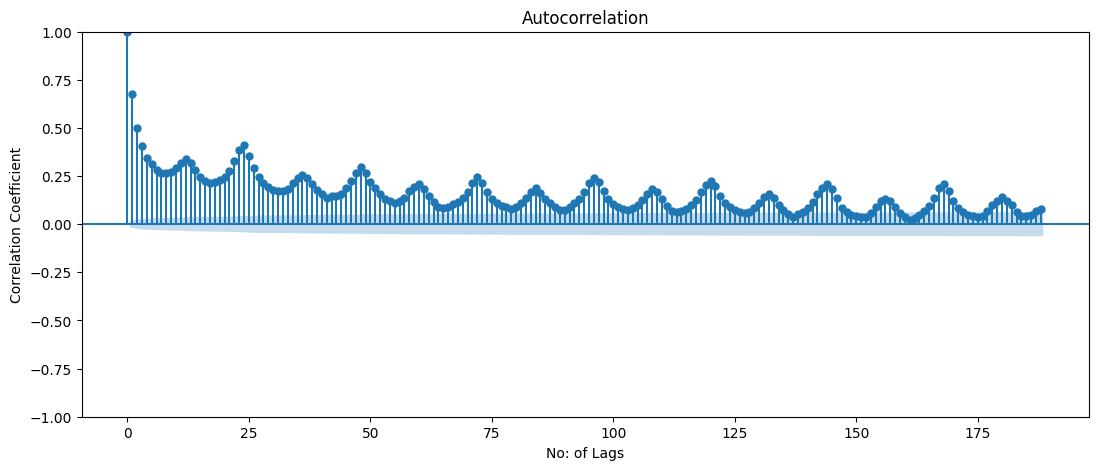

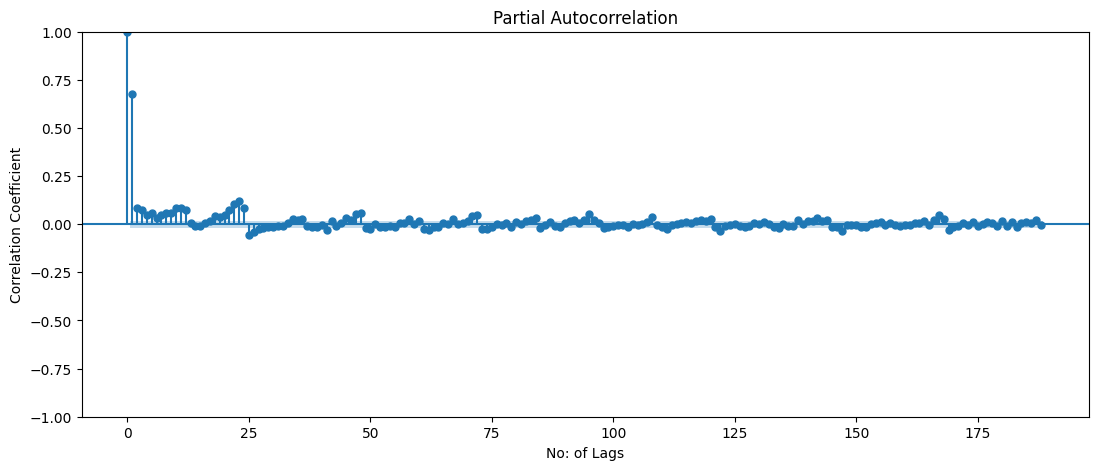

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#lag refers to the time difference between two points in the series. Here we have 4503 train data.
#As here we have 188 weeks of data shall we use lags= 188

fig, ax = plt.subplots(figsize=(13, 5))  # Width=10, Height=6
plt.xlabel('No: of Lags')
plt.ylabel('Correlation Coefficient')
plot_acf(train_data, lags=188, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(13, 5))  # Width=10, Height=6
plt.xlabel('No: of Lags')
plt.ylabel('Correlation Coefficient')
plot_pacf(train_data, lags=188, ax=ax)
plt.show()

In [12]:
model_predictions = []
n_test_obser =len(test_data)
print(len(test_data))
print(len(train_data))
print(len(model_predictions))

3210
12837
0


In [17]:

'''
These autocorrelation and partial autocorrelation graphs help to determine the p,q factors in the 
ARMA model.As this Autocorrelation has a decaying function and partial autocorrelation function 
gives 2 spikes in the start. Then p value of the model is equal to 2. The autocorrelation function 
gives 5 spikes in the beginning so the q value of the model equals 5. 
'''

# Fit the ARMA model
# The '0' indicates no differencing because this is ARMA model
#model = sm.tsa.ARIMA(train_data, order=(p, 0, q))  

#results = model.fit()

#model = ARIMA(train_data, order = (2,0,1))
#model_fit = model.fit()

for i in range(n_test_obser):
  model = ARIMA(train_data, order = (2,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output)
  
  model_predictions.append(yhat)
  actual_test_value = test_data[i]
  train_data.append(actual_test_value)
  print(i)
  
  #break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [11]:
for i in range(1201,3209):

  model = ARIMA(train_data, order = (2,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output)
  
  model_predictions.append(yhat)
  actual_test_value = test_data[i]
  train_data.append(actual_test_value)
  print(i)


print(model_predictions)

1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400


In [12]:

print(model_fit.summary())
#len(model_predictions)
#print(test_data.index)
print(len(model_predictions))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                16046
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -47268.414
Date:                Sun, 03 Mar 2024   AIC                          94544.828
Time:                        17:28:55   BIC                          94575.561
Sample:                             0   HQIC                         94554.991
                              - 16046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.003    158.233      0.000       0.539       0.553
ar.L2          0.0087      0.005      1.855      0.064      -0.000       0.018
ma.L1         -0.9581      0.002   -411.868      0.0

NameError: name 'model_predictions' is not defined

<Figure size 2500x900 with 0 Axes>

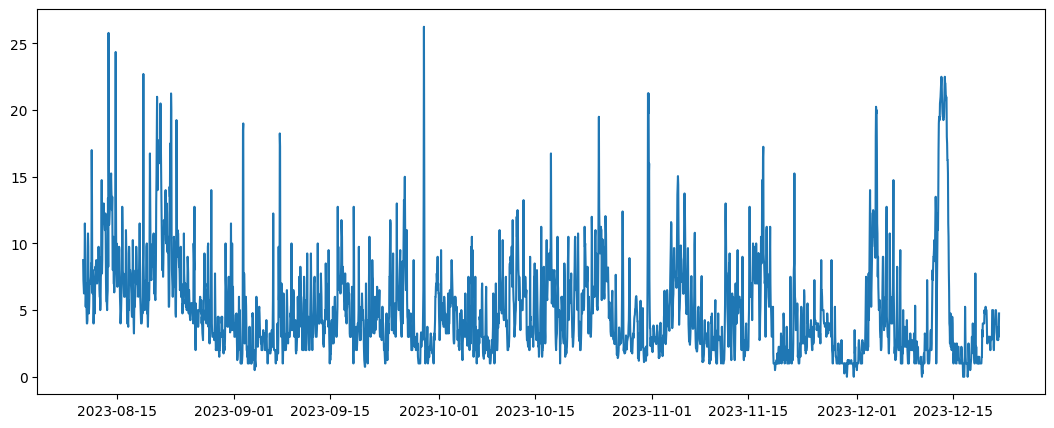

In [8]:

'''
data_range = data1[to_row:].index

plt.plot(data_range, model_predictions, color = 'blue',label = 'PM2.5 predicted value')
plt.plot(data_range, test_data, color = 'red', label = 'PM2.5 actual value')

plt.title("PM2.5 prediction")
plt.legend()
plt.show()
'''
# Create a new index for the forecast steps
#forecast_index = pd.date_range(start=test_data.index[0], periods=n_steps+1, freq='H')[1:]

# Access the predicted values
#predicted_values = forecast_values.predicted_mean.values

plt.figure(figsize=(13, 5))
data_range = data[to_row:].index


plt.plot(data_range[:3210], test_data[:3210], label = 'PM2.5 actual value')
plt.plot(data_range[:3210], model_predictions,label = 'PM2.5 predicted value')
#plt.plot(forecast_index, predicted_values, color='red', label='Predicted Values')
plt.title('PM2.5 Time Series Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentrations')
plt.legend()
plt.show()


In [15]:

y_true = test_data  # Replace with your actual values
y_pred = model_predictions
# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False) # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.4942769591868588
Mean Squared Error (MSE): 4.887894545578978
Root Mean Squared Error (RMSE): 2.210858327794655


In [10]:
import statsmodels.api as sm
loaded_model = sm.load("ARIMA model 2,1,1 cluster 1.pkl")

In [14]:
for i in range(n_test_obser):

  #model = ARIMA(train_data, order = (2,1,1))
  #model_fit = model.fit()
  output = loaded_model.forecast()
  yhat = list(output)
  
  model_predictions.append(yhat)
  #actual_test_value = test_data[i]
  #train_data.append(actual_test_value)
  print(i)


print(model_predictions)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

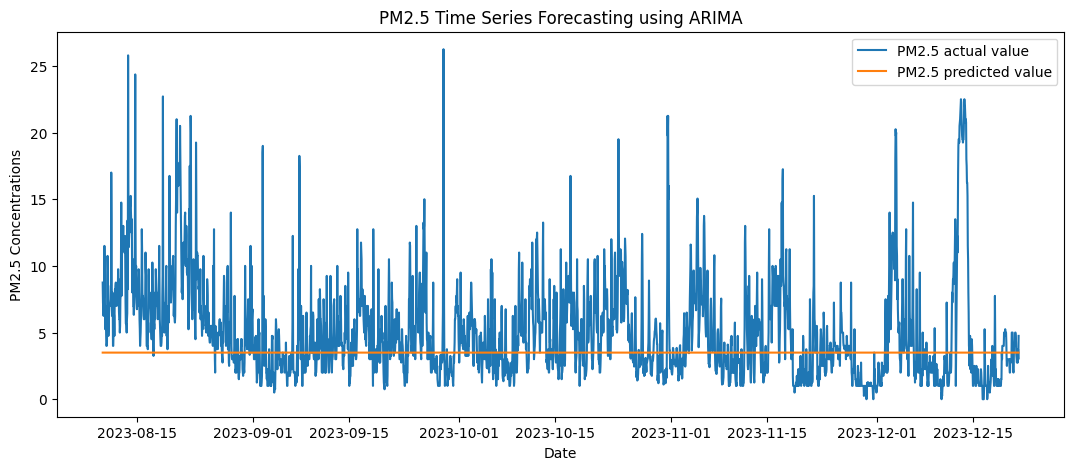

In [15]:
plt.figure(figsize=(13, 5))
data_range = data[to_row:].index


plt.plot(data_range[:3210], test_data[:3210], label = 'PM2.5 actual value')
plt.plot(data_range[:3210], model_predictions,label = 'PM2.5 predicted value')
#plt.plot(forecast_index, predicted_values, color='red', label='Predicted Values')
plt.title('PM2.5 Time Series Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentrations')
plt.legend()
plt.show()